In [81]:
##importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
## Reading in data
path ="C:/Users/daisy.chelangat/Downloads/Maternal Health Risk Data Set.csv"

##Glimpse of the data
data = pd.read_csv(path)

print(data.head())

###Missing values

missing_values_count = data.isnull().sum()
print(missing_values_count)

###data type

data.dtypes

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000

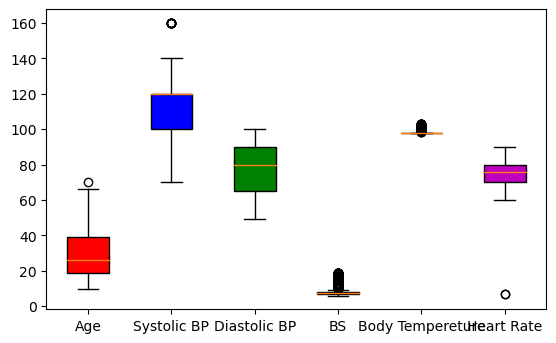

In [86]:
## EDA and Visualizations
print(data.describe())

###filtering out those outside the child bearing age
new_data = data.drop(data[(data['Age']>50) & (data['Age']<15)].index) ##filters age more than 50 years & less than 15 years


print(new_data.describe())
###boxplot of the fearures

plot_data = new_data[['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']]
##plot
fig = plt.figure(figsize =(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
box=plt.boxplot(plot_data, patch_artist=True)
##changing colors

colors = ['r', 'b','g', 'c','y','m']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

##box plot labels

ax.set_xticklabels(['Age','Systolic BP','Diastolic BP','BS','Body Tempereture','Heart Rate'])
 
# show plot
plt.show()

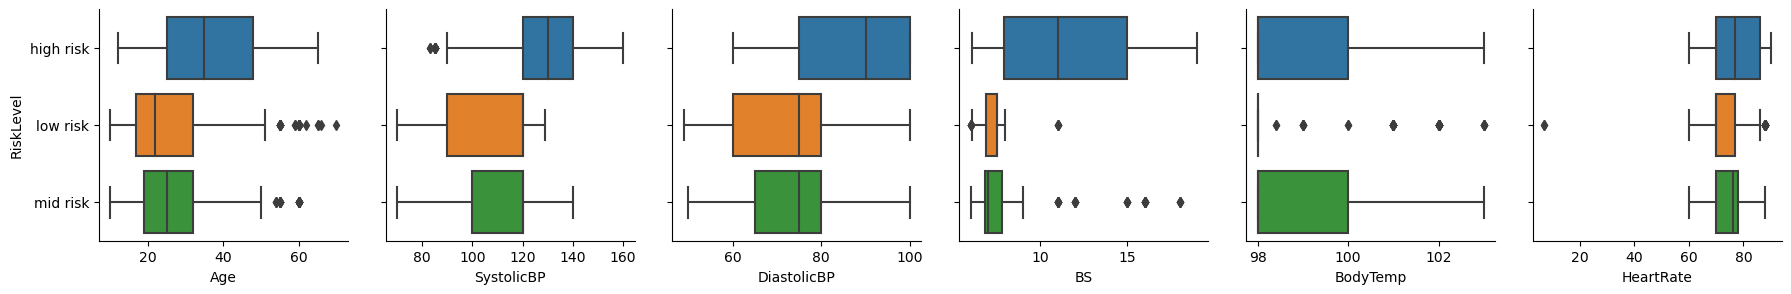

In [87]:
# relationship between risk level and the features
g = sns.PairGrid(new_data, x_vars=['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate'], y_vars="RiskLevel", height=3.0)
g.map(sns.boxplot)

In [88]:
##spliting data into training,validation and test sets
##one-hot encoding the label
Risk_columns = pd.get_dummies(data['RiskLevel'], prefix='Risk')## creating one hot encoded column
new_data = pd.concat([new_data, Risk_columns], axis=1)##concatinating dataset with new column
new_data = new_data.drop(['RiskLevel'], axis=1) ##delete old column
labels = ['Risk_high risk','Risk_low risk','Risk_mid risk']
features=['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']
y= new_data[labels]
x = new_data[features]
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(x, y,
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2




[Text(0.6009615384615384, 0.9166666666666666, 'X[3] <= 7.95\ngini = 0.438\nsamples = 608\nvalue = [[443, 165]\n[360, 248]\n[413, 195]]'),
 Text(0.41346153846153844, 0.75, 'X[1] <= 132.5\ngini = 0.382\nsamples = 450\nvalue = [[401, 49]\n[207, 243]\n[292, 158]]'),
 Text(0.28846153846153844, 0.5833333333333334, 'X[3] <= 7.055\ngini = 0.351\nsamples = 421\nvalue = [[399, 22]\n[178, 243]\n[265, 156]]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[1] <= 105.0\ngini = 0.355\nsamples = 227\nvalue = [[219, 8]\n[123, 104]\n[112, 115]]'),
 Text(0.07692307692307693, 0.25, 'X[0] <= 15.5\ngini = 0.342\nsamples = 85\nvalue = [[81, 4]\n[34, 51]\n[55, 30]]'),
 Text(0.038461538461538464, 0.08333333333333333, 'gini = 0.234\nsamples = 22\nvalue = [[22, 0]\n[5, 17]\n[17, 5]]'),
 Text(0.11538461538461539, 0.08333333333333333, 'gini = 0.365\nsamples = 63\nvalue = [[59, 4]\n[29, 34]\n[38, 25]]'),
 Text(0.23076923076923078, 0.25, 'X[0] <= 39.0\ngini = 0.334\nsamples = 142\nvalue = [[138, 4]\n[89, 53]\n[5

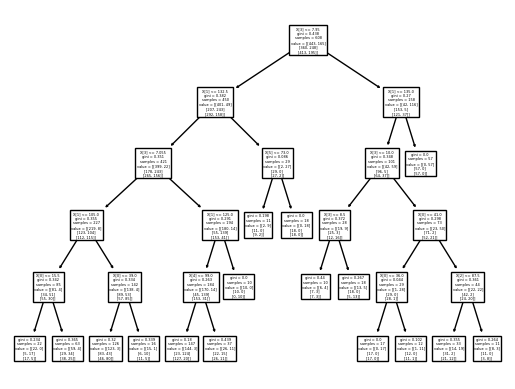

In [99]:
##Decision tree
import utils
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

decision_tree = DecisionTreeClassifier(max_depth=3,
min_samples_leaf=10, min_samples_split=10)
decision_tree.fit(X_train,y_train)
tree.plot_tree(decision_tree)


In [101]:
from sklearn.metrics import accuracy_score
predictions = decision_tree.predict(X_val)
acc = accuracy_score(y_val, predicitions)
print(acc)
decision_tree.score(X_val,y_val)##model accuracy



0.6206896551724138


0.6009852216748769